# **1. Perkenalan Dataset**


Dataset yang digunakan dalam penelitian ini adalah Hotel Booking Demand Dataset yang bersumber dari [Kaggle](https://www.kaggle.com/code/fahadrehman07/hotel-booking-analysis). Dataset ini berisi data pemesanan hotel dari dua jenis hotel, yaitu city hotel dan resort hotel. Dataset ini digunakan untuk memahami pola pemesanan pelanggan, menganalisis faktor-faktor yang memengaruhi pembatalan reservasi, serta membantu pihak hotel dalam pengambilan keputusan terkait manajemen reservasi dan strategi bisnis. Dataset ini mencakup informasi terkait karakteristik tamu, detail pemesanan, waktu menginap, hingga status pembatalan reservasi, sehingga dapat dimanfaatkan untuk berbagai keperluan analisis dan pemodelan prediktif.

### **Struktur Dataset**

Dataset ini terdiri dari beberapa kelompok variabel utama, yaitu:

- Informasi hotel: ```hotel```
- Waktu dan detail pemesanan: ```lead_time```, ```arrival_date_year```, ```arrival_date_month```, ```arrival_date_week_number```, ```arrival_date_day_of_month```, ```stays_in_weekend_nights```, ```stays_in_week_nights```
- Informasi tamu: ```adults```, ```children```, ```babies```, ```country```, ```customer_type```
- Detail reservasi: ```meal```, ```market_segment```, ```distribution_channel```, ```reserved_room_type```, ```assigned_room_type```, ```booking_changes```, ```deposit_type```
- Informasi pembayaran dan harga: ```adr```, ```required_car_parking_spaces```
- Riwayat pemesanan sebelumnya: ```previous_cancellations```, ```previous_bookings_not_canceled```
- Target variabel: ```is_canceled```


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [80]:
# memuat dataset
df = pd.read_csv('../hotel_bookings_raw.csv')

In [81]:
# 5 baris teratas
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Informasi Dataset**

In [82]:
# ukuran dataset
df.shape

(119390, 32)

In [83]:
# list kolom
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [84]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [85]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [86]:
# cek missing value
missing_value = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
missing_value

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [87]:

df.drop(['company','agent'], axis =1, inplace = True)
df.dropna(inplace =True)

df.isnull().sum().sum()

np.int64(0)

In [88]:
# statistik deskriptif
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [89]:
# list kolom
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### **2. Distribusi target**

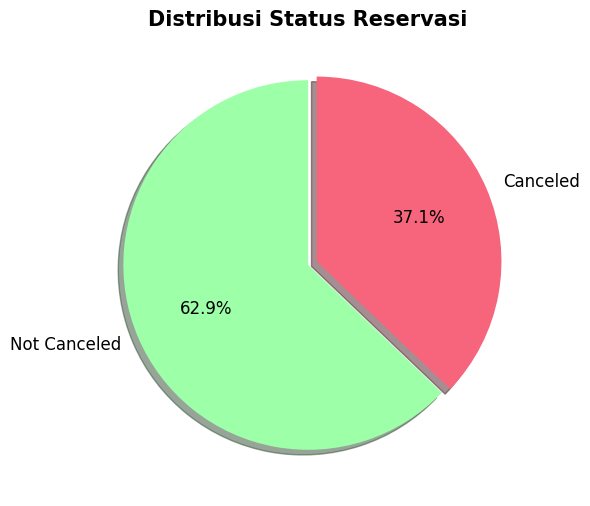

In [90]:

counts = df['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled'] 
colors = ["#9EFFA9", "#F7657D"]
explode = [0, 0.05] 

plt.figure(figsize=(6, 6))
plt.title('Distribusi Status Reservasi', fontsize=15, fontweight='bold')

plt.pie(counts, 
        labels=labels,       
        colors=colors, 
        autopct='%1.1f%%',  
        explode=explode,    
        shadow=True,        
        startangle=90,      
        textprops={'fontsize': 12, 'color': 'black'}) 

plt.show()

Distribusi persentase antara reservasi yang dibatalkan dan yang tidak. Tampak jelas bahwa porsi terbesar reservasi tetap berjalan tanpa pembatalan. Meski demikian, angka pembatalan yang mencapai 37% merupakan jumlah yang substansial dan memiliki dampak nyata terhadap pendapatan hotel.

### **3. Status Reservasi Berdasarkan Tipe Hotel**

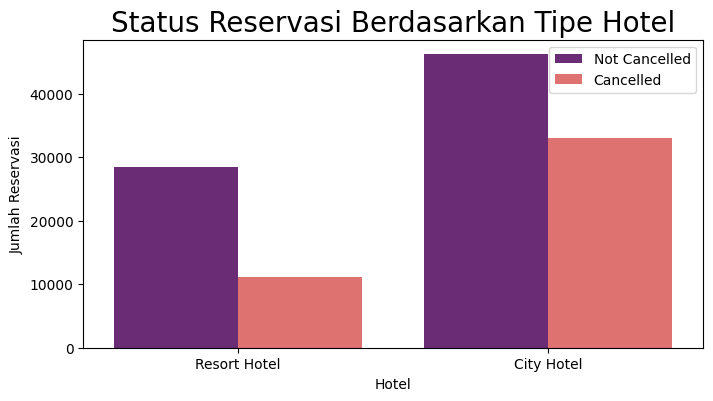

In [91]:
plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="magma")

legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Status Reservasi Berdasarkan Tipe Hotel', size=20, color='Black')
plt.xlabel('Hotel',color='Black')
plt.ylabel('Jumlah Reservasi', color='Black')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

Dibandingkan dengan resort hotel, city hotel menunjukkan jumlah pemesanan yang lebih tinggi. Salah satu faktor yang mungkin memengaruhi kondisi tersebut adalah perbedaan harga, di mana resort hotel umumnya memiliki tarif yang lebih tinggi dibandingkan hotel yang berlokasi di perkotaan.

### **4. ADR City Hotel VS Resort Hotel**

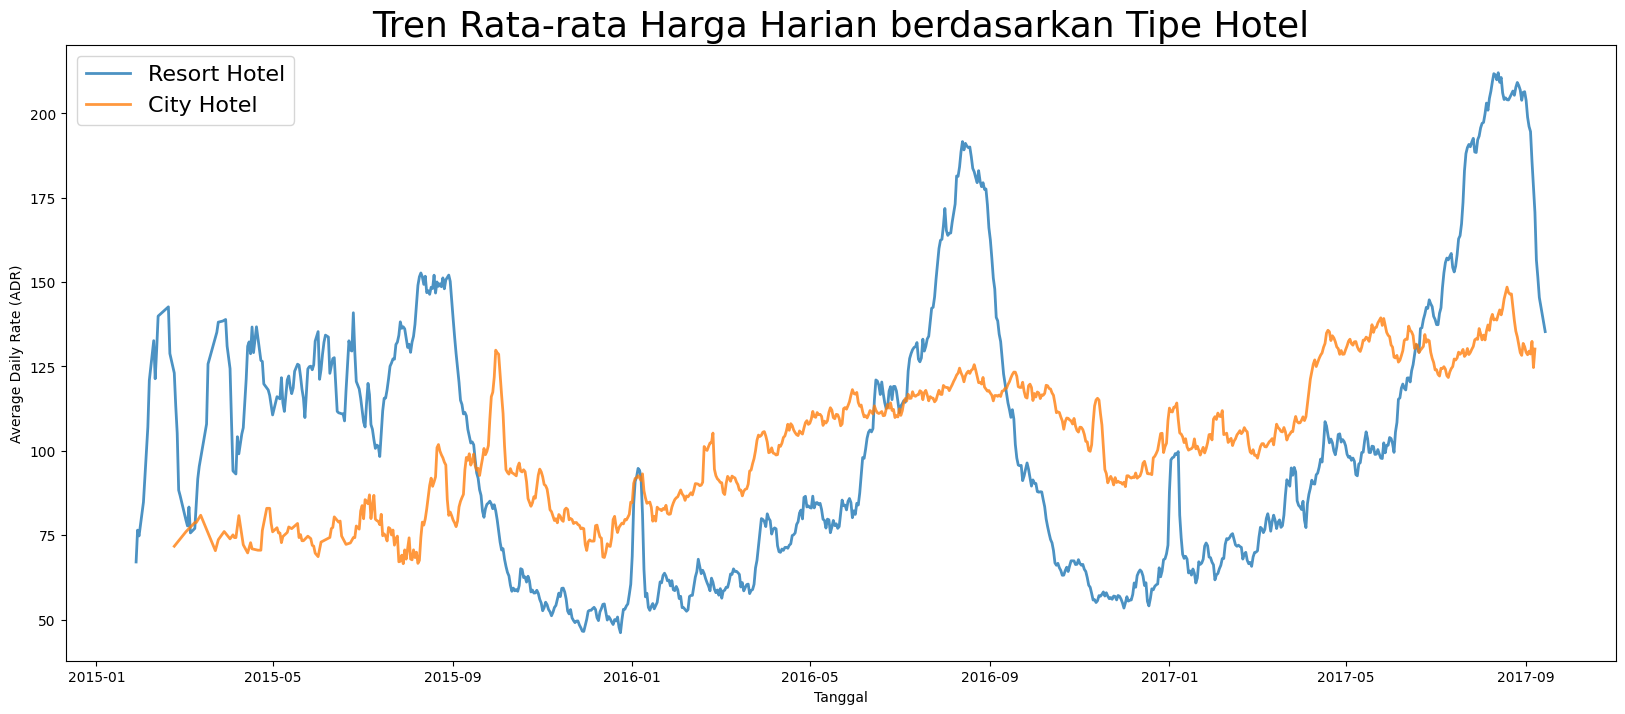

In [92]:
# memisahkan data berdasarkan tipe hotel
data_resort = df[df['hotel'] == 'Resort Hotel']
data_city = df[df['hotel'] == 'City Hotel']

# menghitung tingkat pembatalan
cancel_rate_resort = data_resort['is_canceled'].value_counts(normalize=True)
cancel_rate_city = data_city['is_canceled'].value_counts(normalize=True)

# menghitung rata-rata ADR harian
adr_resort = (
    data_resort
    .groupby('reservation_status_date')['adr']
    .mean()
    .sort_index()
)

adr_city = (
    data_city
    .groupby('reservation_status_date')['adr']
    .mean()
    .sort_index()
)

# smoothing data menggunakan rolling average (7 hari)
adr_resort_smooth = adr_resort.rolling(window=7).mean()
adr_city_smooth = adr_city.rolling(window=7).mean()

# visualisasi 
plt.figure(figsize=(20, 8))

plt.plot(
    adr_resort_smooth.index,
    adr_resort_smooth,
    label='Resort Hotel',
    linewidth=2,
    alpha=0.8
)

plt.plot(
    adr_city_smooth.index,
    adr_city_smooth,
    label='City Hotel',
    linewidth=2,
    alpha=0.8
)

plt.title(
    'Tren Rata-rata Harga Harian berdasarkan Tipe Hotel',
    fontsize=26
)
plt.xlabel('Tanggal')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(fontsize=16)

plt.show()


Grafik di atas menunjukkan bahwa pada hari-hari tertentu, rata-rata tarif harian untuk City Hotel lebih rendah daripada Resort Hotel, bahkan terkadang selisihnya cukup signifikan. Dapat dipastikan bahwa kenaikan tarif pada Resort Hotel kemungkinan besar terjadi karena lonjakan permintaan saat akhir pekan dan hari libur.

### **5. Statistik Reservasi Dikelompokkan Berdasarkan Bulan**

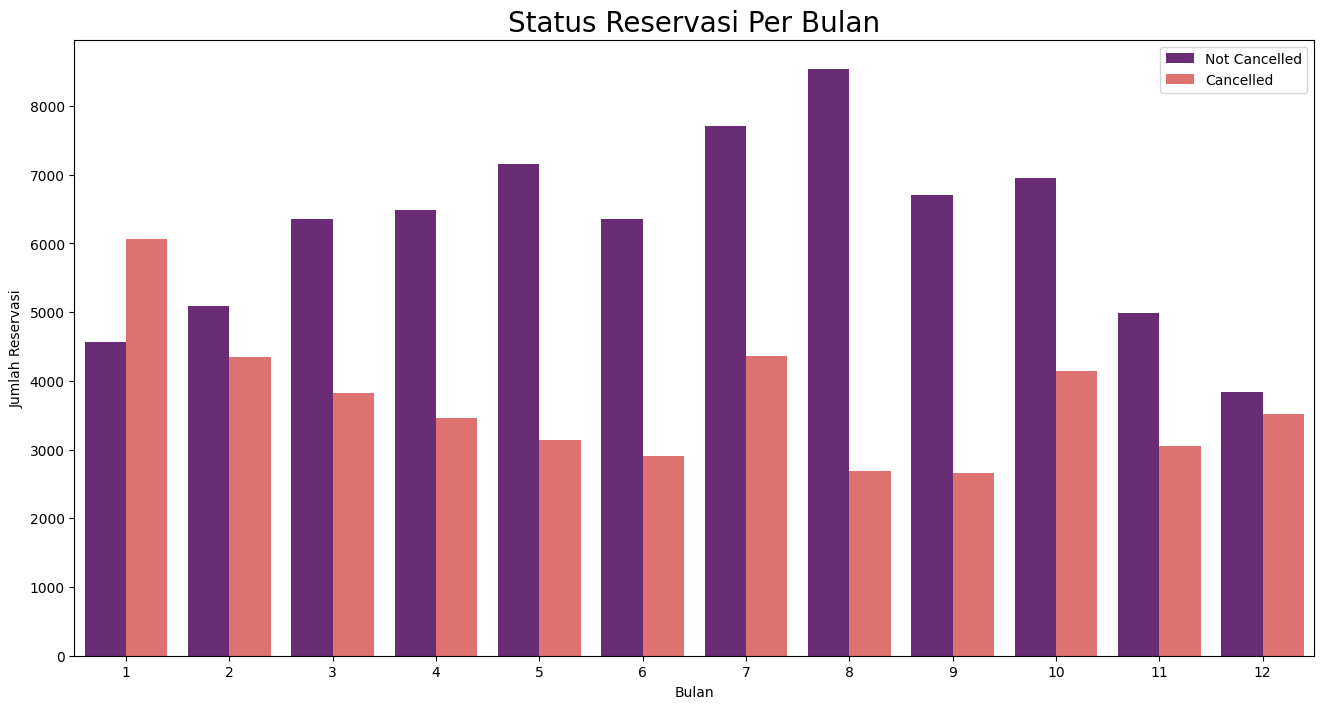

In [93]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'magma')
plt.title('Status Reservasi Per Bulan', size = 20)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reservasi')
plt.legend(['Not Cancelled','Cancelled'])
plt.show()

Dari diagram tersebut, terlihat jelas bahwa bulan Agustus paling menonjol karena memiliki jumlah reservasi tertinggi dan status pembatalan terendah. Sebaliknya, bulan Januari mencatat jumlah reservasi terkonfirmasi paling sedikit, namun memiliki jumlah pembatalan tertinggi.

### **6. Pembatalan Reservasi Berdasarkan Negara**

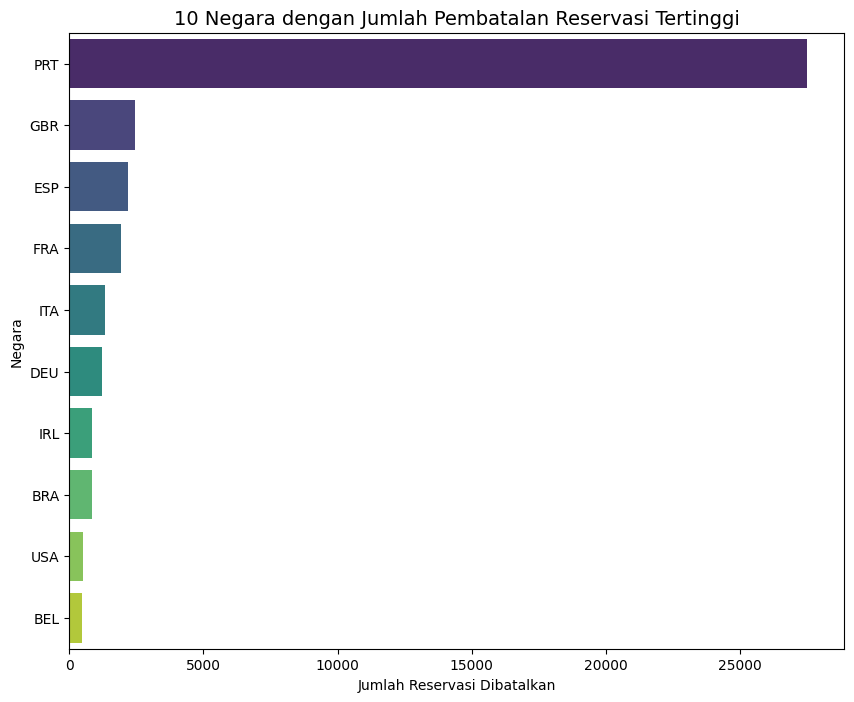

In [94]:
cancelled_data = df[df['is_canceled'] == 1]

# hitung 10 negara dengan pembatalan terbanyak
top_10_country = (
    cancelled_data['country']
    .value_counts()
    .head(10)
    .reset_index()
)

top_10_country.columns = ['country', 'total_cancelled']

# visualisasi barplot (diurutkan dari tinggi ke rendah)
plt.figure(figsize=(10, 8))
sns.barplot(
    y='country',
    x='total_cancelled',
    data=top_10_country,
    palette='viridis'
)

plt.title('10 Negara dengan Jumlah Pembatalan Reservasi Tertinggi', fontsize=14)
plt.xlabel('Jumlah Reservasi Dibatalkan')
plt.ylabel('Negara')
plt.show()


Grafik menunjukkan bahwa **Portugal (PRT)** memiliki jumlah pembatalan reservasi yang jauh lebih tinggi dibandingkan negara lain, sehingga menjadi kontributor utama pembatalan. perbedaan yang cukup signifikan ini mengindikasikan bahwa volume pemesanan atau perilaku pelanggan dari Portugal memiliki pengaruh besar terhadap tingkat pembatalan secara keseluruhan.


### **7. Hubungan Average Daily Rate (ADR) terhadap Pembatalan Reservasi**

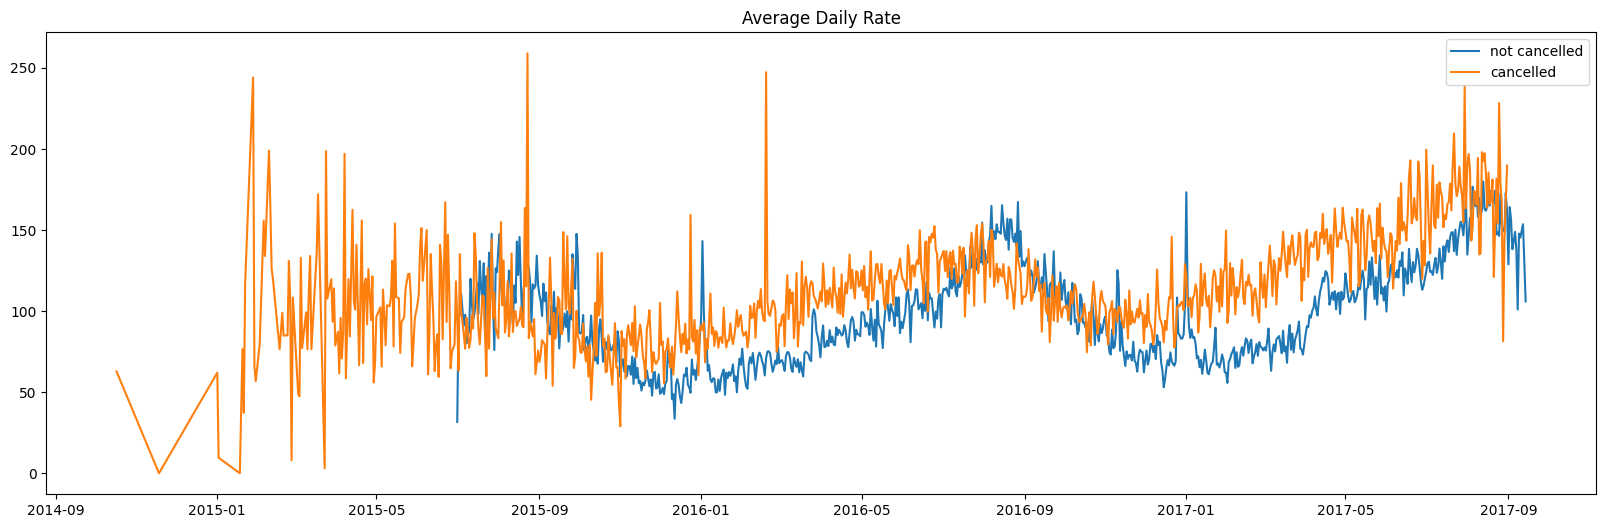

In [95]:
df['market_segment'].value_counts()
df['market_segment'].value_counts(normalize=True)

cancelled_data['market_segment'].value_counts(normalize=True)
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daily Rate', color="Black")
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

Pembatalan reservasi cenderung terjadi ketika nilai Average Daily Rate (ADR) lebih tinggi dibandingkan reservasi yang tidak dibatalkan. temuan ini memperkuat hasil analisis sebelumnya yang menunjukkan bahwa kenaikan harga berhubungan dengan meningkatnya tingkat pembatalan reservasi.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [96]:
df = pd.read_csv('../hotel_bookings_raw.csv')

### **1. Penanganan Missing Value**

In [97]:
# cek missing value
missing_value = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
missing_value.sort_values(by='Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
hotel,0,0.000000
is_canceled,0,0.000000
stays_in_weekend_nights,0,0.000000
arrival_date_day_of_month,0,0.000000


In [98]:
nilai_missing_value_before = df.isnull().sum().sum()

# drop kolom dengan missing value > 10%
df.drop(['company','agent'], axis =1, inplace = True)

# drop missing value
df.dropna(inplace =True)

nilai_missing_value_after = df.isnull().sum().sum()

# hapus data tamu = 0
zero_guest = (
    (df['adults'] == 0) &
    (df['children'] == 0) &
    (df['babies'] == 0)
)
df = df[~zero_guest]

print("Jumlah missing value sebelum pembersihan:", nilai_missing_value_before)
print("Jumlah missing value setelah pembersihan:", nilai_missing_value_after)

Jumlah missing value sebelum pembersihan: 129425
Jumlah missing value setelah pembersihan: 0


### **2. Penghapusan Data Duplikat**

In [99]:
print("Jumlah data sebelum menghapus duplikasi:", df.shape[0])

# cek data duplikat
df.duplicated().sum()
print("Jumlah data duplikat:", df.duplicated().sum())

# hapus data duplikat
df.drop_duplicates(inplace=True)

print("Jumlah data setelah menghapus duplikasi:", df.shape[0])

Jumlah data sebelum menghapus duplikasi: 118728
Jumlah data duplikat: 31975
Jumlah data setelah menghapus duplikasi: 86753


### **3. Konversi Tipe Data**
Kolom ```reservation_status_date``` dikonversi ke format datetime agar dapat digunakan untuk analisis berbasis waktu.

In [100]:
# konversi kolom tanggal ke datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

### **4. Binning (Pengelompokan Data)**

Variabel ```lead_time``` dikelompokkan ke dalam beberapa kategori untuk menangkap pola umum perilaku pemesanan.

In [101]:
df['lead_time_category'] = pd.cut(
    df['lead_time'],
    bins=[-1, 0.5, 1.5, 3, df['lead_time'].max()],
    labels=['Very Short', 'Short', 'Medium', 'Long']
)
df.drop('lead_time', axis=1, inplace=True)
df['lead_time_category'].value_counts()

lead_time_category
Long          74256
Very Short     5790
Medium         3573
Short          3134
Name: count, dtype: int64

### **5. Deteksi dan Penanganan Outlier**


In [102]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
        
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
        
    df = df[(df[col] >= lower) & (df[col] <= upper)]

### **6. Standarisasi Fitur Numerik**

In [103]:
scaler = StandardScaler()
    
numeric_cols = df.select_dtypes(
    include=['int64', 'float64']
).columns.tolist()
    
numeric_cols.remove('is_canceled')
    
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.describe()

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,40065.000000,4.006500e+04,4.006500e+04,4.006500e+04,4.006500e+04,40065.000000,40065.0,40065.0,40065.0,40065.0,40065.0,40065.0,40065.0,40065.0,4.006500e+04,40065.0,4.006500e+04,40065
mean,0.315637,3.305190e-14,-4.540096e-17,5.887937e-17,9.080192e-17,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.540096e-17,0.0,1.702536e-17,2016-08-30 12:41:49.082740736
min,0.000000,-1.792822e+00,-1.893007e+00,-1.661924e+00,-1.110450e+00,-1.590329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.697829e+00,0.0,-9.140349e-01,2014-11-18 00:00:00
25%,0.000000,-3.268856e-01,-7.783513e-01,-8.727204e-01,-1.110450e+00,-0.979168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.519485e-01,0.0,-9.140349e-01,2016-03-20 00:00:00
50%,0.000000,-3.268856e-01,-3.524758e-02,2.922631e-02,-2.197863e-02,-0.368008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.945142e-02,0.0,5.027404e-01,2016-09-07 00:00:00
75%,1.000000,1.139050e+00,7.821665e-01,9.311730e-01,1.066493e+00,0.854313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.335645e-01,0.0,5.027404e-01,2017-03-05 00:00:00
max,1.000000,1.139050e+00,1.971133e+00,1.720376e+00,3.243437e+00,3.298954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.840818e+00,0.0,1.919516e+00,2017-09-09 00:00:00
std,0.464775,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000012e+00,0.0,1.000012e+00,NaN


### **7. Encoding Data Kategorikal**

In [104]:

# label encoding untuk country
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['country'])

df.drop(columns=['country'], inplace=True)

# one-hot encoding untuk selain country
categorical_cols = df.select_dtypes(
    include=['object', 'category']
).columns.tolist()

categorical_cols.remove('arrival_date_month')
df = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

# mapping bulan
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7,
    'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
}

df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)
df.drop(columns=['arrival_date_month'], inplace=True)

df.head()


,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,lead_time_category_Short,lead_time_category_Medium,lead_time_category_Long,arrival_date_month_num
4,0,-1.792822,0.039063,-1.661924,-1.11045,-0.368008,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,True,7
6,0,-1.792822,0.039063,-1.661924,-1.11045,-0.368008,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,False,7
7,0,-1.792822,0.039063,-1.661924,-1.11045,-0.368008,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,True,7
8,1,-1.792822,0.039063,-1.661924,-1.11045,0.243152,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,7
9,1,-1.792822,0.039063,-1.661924,-1.11045,0.243152,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,7


In [105]:
# hasil preprocessing
df.head()

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,lead_time_category_Short,lead_time_category_Medium,lead_time_category_Long,arrival_date_month_num
4,0,-1.792822,0.039063,-1.661924,-1.11045,-0.368008,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,True,7
6,0,-1.792822,0.039063,-1.661924,-1.11045,-0.368008,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,False,7
7,0,-1.792822,0.039063,-1.661924,-1.11045,-0.368008,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,True,7
8,1,-1.792822,0.039063,-1.661924,-1.11045,0.243152,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,7
9,1,-1.792822,0.039063,-1.661924,-1.11045,0.243152,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,True,7


In [106]:
# save dataset
df.to_csv('hotel_bookings_preprocessing.csv', index=False)